In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None) # show all columns

In [5]:
df = pd.read_excel('Canada.xlsx', skiprows=20, 
    skipfooter=2, sheet_name='Canada by Citizenship')

In [6]:
# preprocessing 
cols_to_drop = ['Type','Coverage','AREA','REG','DEV'] # list of unwanted cols
df.drop(columns = cols_to_drop, inplace=True)         # dropping the columns
years = range(1980,2014)                              # list of years 1980-2013
df.rename({                                           
    'OdName':'Country',
    'AreaName':'Continent',
    'RegName': 'Region',
    'DevName':'Status',
}, axis=1, inplace=True)                              # renaming the columns to our preferences
df.set_index('Country', inplace=True)                 # making country as index as each country is unique for our data
df['Total'] = df[years].sum(axis=1)                   # adding a new column from existing data
df.head(3)                                            # show output, first 3 row

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [7]:
df.rename({'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True) # replace all occurances to UK

<AxesSubplot: title={'center': 'Top 10 countries'}, xlabel='Country'>

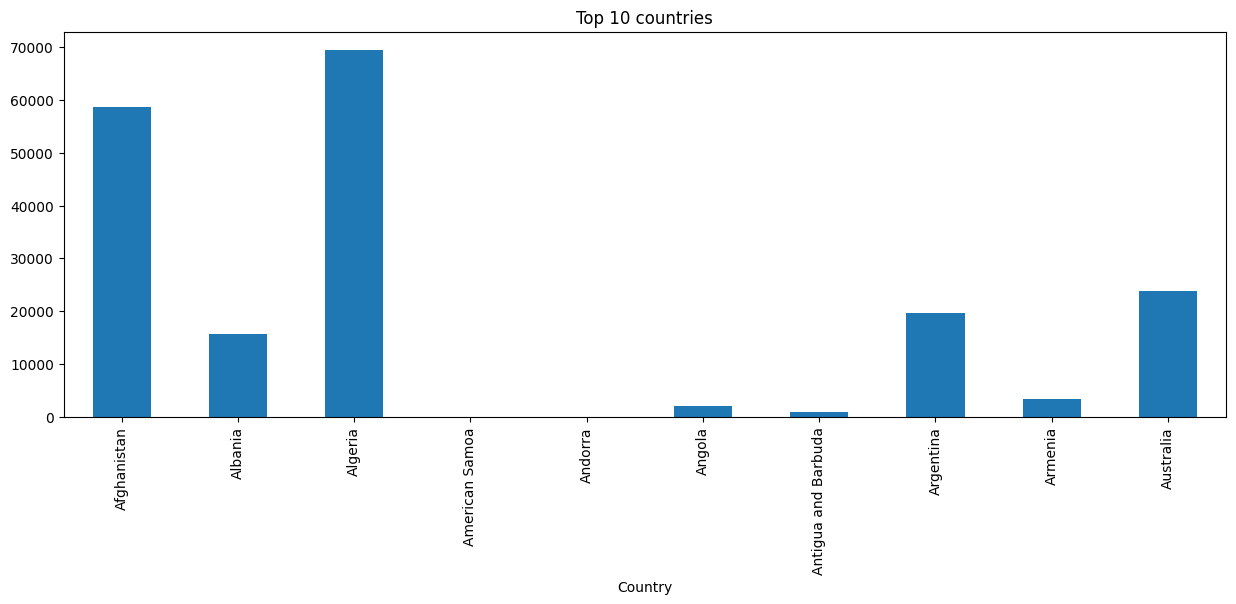

In [8]:
df.head(10)['Total'].plot(kind='bar',figsize=(15,5),title='Top 10 countries')


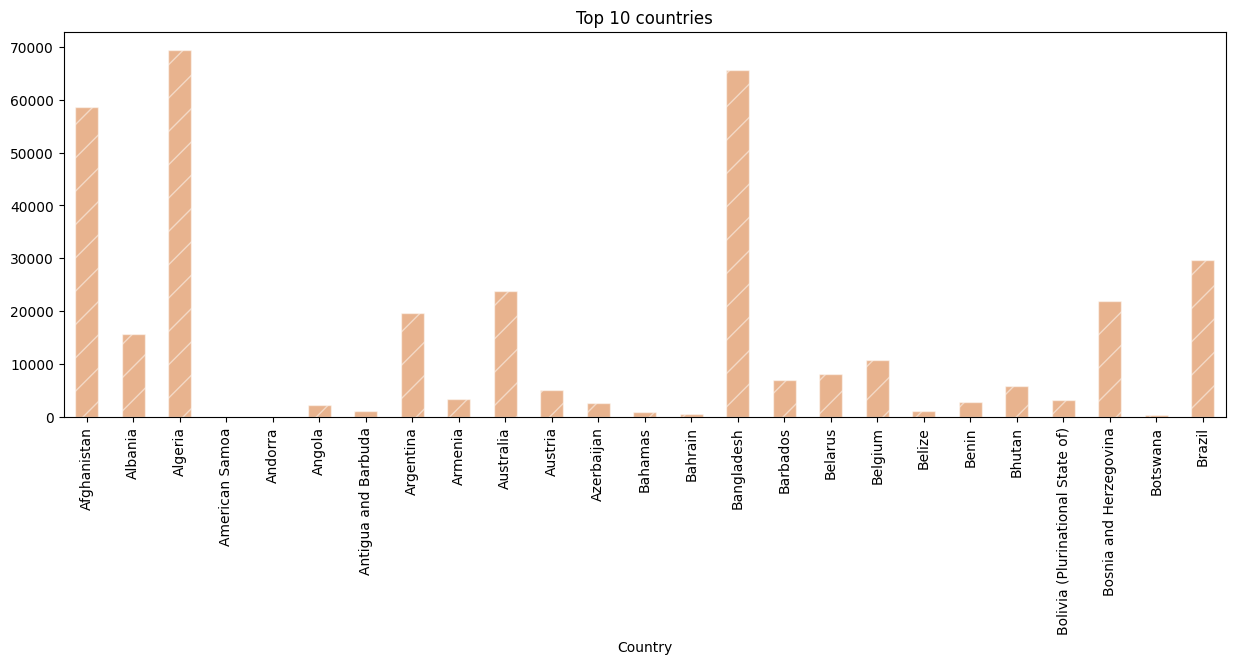

In [9]:
df.head(25)['Total'].plot(kind='bar',figsize=(15,5),title='Top 10 countries',
    color='chocolate', alpha=.5, edgecolor='white', hatch='/')
plt.savefig('top_25_countries_with_immigration.jpg', bbox_inches='tight') # save this graph

In [10]:
# compare India, China, Uk immigration
countries = ['India', 'China', 'UK']
df.loc[countries, years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
UK,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827


In [11]:
px.funnel(df.head(),x=df.head().index,y=[1980,1990,2000,2010])


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=1980<br>x=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '1980',
              'marker': {'color': '#636efa'},
              'name': '1980',
              'orientation': 'v',
              'showlegend': True,
              'type': 'funnel',
              'x': array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([16,  1, 80,  0,  0], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=1990<br>x=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '1990',
              'marker': {'color': '#EF553B'},
              'name': '1990',
              'orientation': 'v',
              'showlegend': True,
              'type': 'funnel',
              'x': array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([1028,    3,  491,    2,    3], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=2000<br>x=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '2000',
              'marker': {'color': '#00cc96'},
              'name': '2000',
              'orientation': 'v',
              'showlegend': True,
              'type': 'funnel',
              'x': array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([3326, 1816, 2867,    0,    0], dtype=int64),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=2010<br>x=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '2010',
              'marker': {'color': '#ab63fa'},
              'name': '2010',
              'orientation': 'v',
              'showlegend': True,
              'type': 'funnel',
              'x': array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([1758,  561, 4752,    0,    0], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [12]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001CC57F113A0>
File:           c:\users\dell\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
